In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
import re
from textblob import TextBlob
from wordcloud import WordCloud
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
warnings.warn('this will not show')

In [3]:
df=pd.read_csv('russia_uk.csv',usecols=['location','following','followers', 'totaltweets','tweetid','tweetcreatedts', 'retweetcount', 'text', 'hashtags', 'language','favorite_count'])
df

,location,following,followers,totaltweets,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,favorite_count
0,Afrika Borwa,219,197,4789,1560416252937617411,2022-08-19 00:00:00,0,Dear vaccine advocate\n\nDo take the COVID19 m...,"[{'text': 'Pfizer', 'indices': [189, 196]}, {'...",en,0
1,"Puebla, México",1419,6402,70267,1560416256179707904,2022-08-19 00:00:01,0,#Mundo \n\nAl menos 6 muertos y 16 heridos en ...,"[{'text': 'Mundo', 'indices': [0, 6]}, {'text'...",es,0
2,Ukraine,782,109,1198,1560416257752666113,2022-08-19 00:00:01,0,"Animal shelter Dogs and Cats, we need your hel...","[{'text': 'Ukraine', 'indices': [189, 197]}, {...",en,1
3,Ukraine,5,39,690,1560416257790382081,2022-08-19 00:00:01,0,"Welcome to our shelter!\nLocated in Ukraine, K...","[{'text': 'Ukraine', 'indices': [194, 202]}, {...",en,2
4,Nuevo Laredo,2269,17978,56188,1560416257937051648,2022-08-19 00:00:01,0,"Tensión, debido a que #Rusia sigue en pie en l...","[{'text': 'Rusia', 'indices': [22, 28]}, {'tex...",es,0
...,...,...,...,...,...,...,...,...,...,...,...
237293,"Tijuana, Baja California",5980,6702,10131,1562228135743016960,2022-08-23 23:59:47,0,"не война ,, \n\n#russia #RussiaUkraineWar #Rus...","[{'text': 'russia', 'indices': [14, 21]}, {'te...",ru,0
237294,"Toronto, Canada",278,113,15257,1562228144878272512,2022-08-23 23:59:49,1,"Trudeau, Scholz to sign #hydrogendeal as Germa...","[{'text': 'hydrogendeal', 'indices': [24, 37]}...",en,1
237295,Florence,711,427,20637,1562228164037734404,2022-08-23 23:59:53,2,"the war goes bad, the #Russians don't want to ...","[{'text': 'Russians', 'indices': [22, 31]}, {'...",en,0
237296,"München, Bayern",17,15,2474,1562228176583016448,2022-08-23 23:59:56,0,"Klar, Herr @Bundeskanzler warum auch nicht für...","[{'text': 'Waffenlieferungen', 'indices': [75,...",de,0


In [4]:
df.shape

(237298, 11)

In [5]:
df.columns

Index(['location', 'following', 'followers', 'totaltweets', 'tweetid',
       'tweetcreatedts', 'retweetcount', 'text', 'hashtags', 'language',
       'favorite_count'],
      dtype='object')

In [7]:
df.rename(columns={'text':'tweet'},inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237298 entries, 0 to 237297
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   location        154526 non-null  object
 1   following       237298 non-null  int64 
 2   followers       237298 non-null  int64 
 3   totaltweets     237298 non-null  int64 
 4   tweetid         237298 non-null  int64 
 5   tweetcreatedts  237298 non-null  object
 6   retweetcount    237298 non-null  int64 
 7   tweet           237298 non-null  object
 8   hashtags        237298 non-null  object
 9   language        237298 non-null  object
 10  favorite_count  237298 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 19.9+ MB


In [9]:
df.describe()

,following,followers,totaltweets,tweetid,retweetcount,favorite_count
count,237298.000000,2.372980e+05,2.372980e+05,2.372980e+05,237298.000000,237298.000000
mean,1506.544733,2.998994e+04,6.011855e+04,1.561350e+18,1.610612,7.951344
std,5724.299489,4.220599e+05,1.946902e+05,5.264929e+14,18.304513,113.657076
min,0.000000,0.000000e+00,1.000000e+00,1.560416e+18,0.000000,0.000000
25%,71.000000,9.200000e+01,2.003000e+03,1.560906e+18,0.000000,0.000000
50%,343.000000,4.240000e+02,9.487000e+03,1.561355e+18,0.000000,0.000000
75%,1200.000000,2.092000e+03,4.495175e+04,1.561790e+18,0.000000,2.000000
max,324236.000000,1.832487e+07,4.117826e+06,1.562228e+18,2904.000000,20412.000000


In [10]:
df.isnull().sum()

location          82772
following             0
followers             0
totaltweets           0
tweetid               0
tweetcreatedts        0
retweetcount          0
tweet                 0
hashtags              0
language              0
favorite_count        0
dtype: int64

In [11]:
df=df.dropna()

In [12]:
df=df.reset_index(drop=True)
df

,location,following,followers,totaltweets,tweetid,tweetcreatedts,retweetcount,tweet,hashtags,language,favorite_count
0,Afrika Borwa,219,197,4789,1560416252937617411,2022-08-19 00:00:00,0,Dear vaccine advocate\n\nDo take the COVID19 m...,"[{'text': 'Pfizer', 'indices': [189, 196]}, {'...",en,0
1,"Puebla, México",1419,6402,70267,1560416256179707904,2022-08-19 00:00:01,0,#Mundo \n\nAl menos 6 muertos y 16 heridos en ...,"[{'text': 'Mundo', 'indices': [0, 6]}, {'text'...",es,0
2,Ukraine,782,109,1198,1560416257752666113,2022-08-19 00:00:01,0,"Animal shelter Dogs and Cats, we need your hel...","[{'text': 'Ukraine', 'indices': [189, 197]}, {...",en,1
3,Ukraine,5,39,690,1560416257790382081,2022-08-19 00:00:01,0,"Welcome to our shelter!\nLocated in Ukraine, K...","[{'text': 'Ukraine', 'indices': [194, 202]}, {...",en,2
4,Nuevo Laredo,2269,17978,56188,1560416257937051648,2022-08-19 00:00:01,0,"Tensión, debido a que #Rusia sigue en pie en l...","[{'text': 'Rusia', 'indices': [22, 28]}, {'tex...",es,0
...,...,...,...,...,...,...,...,...,...,...,...
154521,Germany,2573,1461,1029,1562228128205914112,2022-08-23 23:59:45,0,@VictoriaYastrub this is #pedoputin s #RussiaI...,"[{'text': 'pedoputin', 'indices': [25, 35]}, {...",en,3
154522,"Tijuana, Baja California",5980,6702,10131,1562228135743016960,2022-08-23 23:59:47,0,"не война ,, \n\n#russia #RussiaUkraineWar #Rus...","[{'text': 'russia', 'indices': [14, 21]}, {'te...",ru,0
154523,"Toronto, Canada",278,113,15257,1562228144878272512,2022-08-23 23:59:49,1,"Trudeau, Scholz to sign #hydrogendeal as Germa...","[{'text': 'hydrogendeal', 'indices': [24, 37]}...",en,1
154524,Florence,711,427,20637,1562228164037734404,2022-08-23 23:59:53,2,"the war goes bad, the #Russians don't want to ...","[{'text': 'Russians', 'indices': [22, 31]}, {'...",en,0


In [13]:
top_lang=df['language'].value_counts().iloc[0:10]
top_lang

en     73700
und    17608
uk     13459
de     10578
fr      8265
it      6453
ru      5945
es      5810
ja      1975
tr      1414
Name: language, dtype: int64

Text(0.5, 1.0, 'Top 10 language occurrences in tweets')

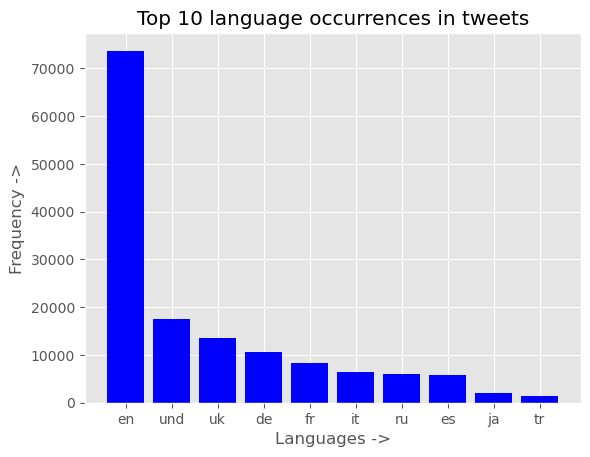

In [14]:
#plot bar graph
plt.bar(top_lang.index,top_lang.values,color='blue')
plt.xlabel('Languages ->')
plt.ylabel('Frequency ->')
plt.title('Top 10 language occurrences in tweets')

In [15]:
df['location'].value_counts().sort_values(ascending=False)

Ukraine                       5786
Україна                       5028
Украина                       2266
United States                 1803
France                        1493
                              ... 
Essex, United Kingdom            1
Blackheath, Blue Mountains       1
Иркутский район                  1
Johns Hopkins University         1
Bothell, WA                      1
Name: location, Length: 18828, dtype: int64

In [16]:
top_loc=df['location'].value_counts().iloc[0:25]
top_loc

Ukraine             5786
Україна             5028
Украина             2266
United States       1803
France              1493
Kyiv, Ukraine       1485
India               1192
Kyiv                1164
Київ                1078
Italia              1016
Colorado, USA        943
Germany              915
Хай живе Україна     900
London, England      851
USA                  812
Planet Earth         788
Earth                785
London               783
Deutschland          770
Paris, France        742
Berlin               728
Washington, DC       700
Europe               673
Internet             667
Скіфія               618
Name: location, dtype: int64

Text(0.5, 1.0, 'Top 20 country with most tweets')

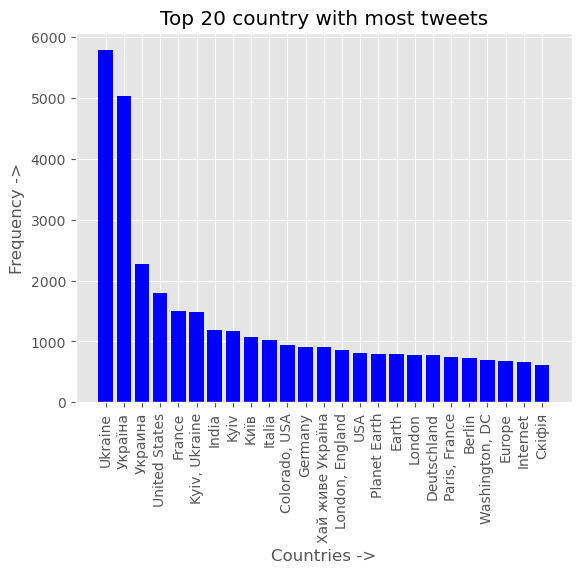

In [17]:
#plot bar graph
plt.bar(top_loc.index,top_loc.values,color='blue',)
plt.xlabel('Countries ->')
plt.xticks(rotation=90)
plt.ylabel('Frequency ->')
plt.title('Top 20 country with most tweets')

In [18]:
df['hashtags'][0]

"[{'text': 'Pfizer', 'indices': [189, 196]}, {'text': 'AstraZeneca', 'indices': [197, 209]}, {'text': 'Moderna', 'indices': [210, 218]}, {'text': 'NWO', 'indices': [219, 223]}, {'text': 'Agenda2030', 'indices': [224, 235]}, {'text': 'COP27', 'indices': [236, 242]}, {'text': 'Biden', 'indices': [243, 249]}, {'text': 'Obama', 'indices': [250, 256]}, {'text': 'Trudeau', 'indices': [257, 265]}, {'text': 'Jacinda', 'indices': [266, 274]}, {'text': 'life', 'indices': [275, 280]}]"

In [19]:
df['hashtags']=df['hashtags'].str.split(':').str[1]

In [20]:
df['hashtags']=df['hashtags'].str.split(',').str[0]

In [21]:
df['hashtags']

0                     'Pfizer'
1                      'Mundo'
2                    'Ukraine'
3                    'Ukraine'
4                      'Rusia'
                  ...         
154521             'pedoputin'
154522                'russia'
154523          'hydrogendeal'
154524              'Russians'
154525     'Waffenlieferungen'
Name: hashtags, Length: 154526, dtype: object

In [22]:
top_hash=df['hashtags'].value_counts().iloc[1:16]
top_hash

 'Russia'                     6429
 'RussiaIsATerroristState'    4373
 'Putin'                      3988
 'StandWithUkraine'           3954
 'Dugin'                      3288
 'SlavaUkraini'               2909
 'UkraineRussiaWar'           2679
 'Biden'                      2400
 'Russian'                    1985
 'Ukraine️'                   1873
 'China'                      1541
 'ukraine'                    1322
 'Ucrania'                    1172
 'Zelensky'                   1170
 'NATO'                       1081
Name: hashtags, dtype: int64

Text(0.5, 1.0, 'Top 15 hashtags occurences')

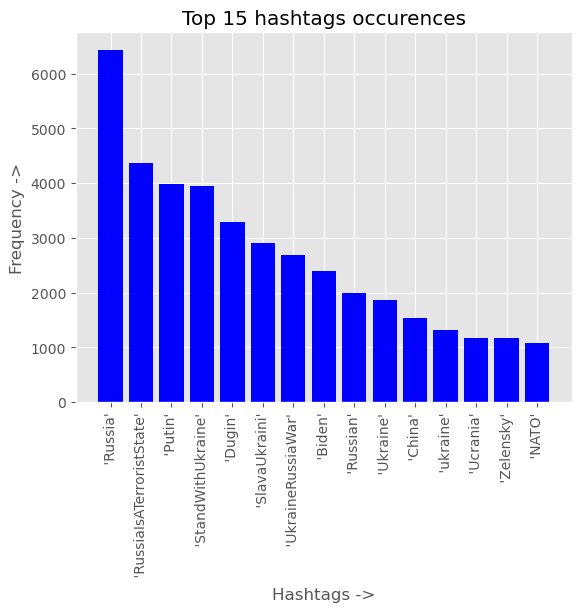

In [23]:
#plot bar graph
plt.bar(top_hash.index.str.split(',').str[0],top_hash.values,color='blue',)
plt.xlabel('Hashtags ->')
plt.xticks(rotation=90)
plt.ylabel('Frequency ->')
plt.title('Top 15 hashtags occurences')

In [24]:
df['tweet'][0]

'Dear vaccine advocate\n\nDo take the COVID19 mRNA shot and boosters, but do know that @OurWorldInData data shows it offers zero protection, actually accelerates death of vaccinated.\n\nRegards\n#Pfizer #AstraZeneca #Moderna #NWO #Agenda2030 #COP27 #Biden #Obama #Trudeau #Jacinda #life https://t.co/VTbfuqiDvu'

In [25]:
df['tweet']=df['tweet'].str.split('http').str[0]

In [26]:
df['tweet']=df['tweet'].str.split('#').str[0]

In [27]:
df['tweet'][0]

'Dear vaccine advocate\n\nDo take the COVID19 mRNA shot and boosters, but do know that @OurWorldInData data shows it offers zero protection, actually accelerates death of vaccinated.\n\nRegards\n'

In [28]:
text=[]
for i in range(len(df)):
    t=re.sub('[^a-zA-Z]',' ',df['tweet'][i])
    t=t.lower()
    t=t.split()
    t=[lemmatizer.lemmatize(word) for word in t if not word in set(stopwords.words('english'))]
    t=' '.join(t)
    text.append(t)

In [29]:
text

['dear vaccine advocate take covid mrna shot booster know ourworldindata data show offer zero protection actually accelerates death vaccinated regard',
 '',
 'animal shelter dog cat need help raising fund food animal paypal dogandcat helper gmail com',
 'welcome shelter located ukraine kyiv shelter need help raising fund food animal paypal dogandcat helper gmail com',
 'tensi n debido que',
 'opinion ukraine war also fought language cnn',
 'art culo de',
 'today crude oil price wti brent pm est',
 'rain delay problem pound pound best',
 '',
 'olena osadcha organization know teamed novaukraine ensure one impacted demographic ukraine getting help support need read',
 'medrinkwine',
 'la puesta en marcha de la iniciativa del mar negro para la exportaci n de grano un acuerdo entre rusia',
 'kremlin handle referendum temporarily occupied territory ukraine russian medium ukrainska pravda',
 'soaking smoke russian tourist flee crimea russian invasion ukraine',
 '',
 'rbreich day country make 

In [30]:
df1=pd.DataFrame(text,columns=['text'])
df1

,text
0,dear vaccine advocate take covid mrna shot boo...
1,
2,animal shelter dog cat need help raising fund ...
3,welcome shelter located ukraine kyiv shelter n...
4,tensi n debido que
...,...
154521,victoriayastrub
154522,
154523,trudeau scholz sign
154524,war go bad


In [31]:
df1['text']=df1['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [32]:
df=pd.concat([df1,df],axis=1)
df.head()

,text,location,following,followers,totaltweets,tweetid,tweetcreatedts,retweetcount,tweet,hashtags,language,favorite_count
0,dear vaccine advocate take covid mrna shot boo...,Afrika Borwa,219,197,4789,1560416252937617411,2022-08-19 00:00:00,0,Dear vaccine advocate\n\nDo take the COVID19 m...,'Pfizer',en,0
1,,"Puebla, México",1419,6402,70267,1560416256179707904,2022-08-19 00:00:01,0,,'Mundo',es,0
2,animal shelter need help raising fund food ani...,Ukraine,782,109,1198,1560416257752666113,2022-08-19 00:00:01,0,"Animal shelter Dogs and Cats, we need your hel...",'Ukraine',en,1
3,welcome shelter located ukraine kyiv shelter n...,Ukraine,5,39,690,1560416257790382081,2022-08-19 00:00:01,0,"Welcome to our shelter!\nLocated in Ukraine, K...",'Ukraine',en,2
4,tensi debido,Nuevo Laredo,2269,17978,56188,1560416257937051648,2022-08-19 00:00:01,0,"Tensión, debido a que",'Rusia',es,0


In [33]:
df.isnull().sum()

text                  0
location              0
following             0
followers             0
totaltweets           0
tweetid               0
tweetcreatedts        0
retweetcount          0
tweet                 0
hashtags          17931
language              0
favorite_count        0
dtype: int64

In [34]:
df=df.dropna()

In [35]:
df=df.reset_index(drop=True)
df

,text,location,following,followers,totaltweets,tweetid,tweetcreatedts,retweetcount,tweet,hashtags,language,favorite_count
0,dear vaccine advocate take covid mrna shot boo...,Afrika Borwa,219,197,4789,1560416252937617411,2022-08-19 00:00:00,0,Dear vaccine advocate\n\nDo take the COVID19 m...,'Pfizer',en,0
1,,"Puebla, México",1419,6402,70267,1560416256179707904,2022-08-19 00:00:01,0,,'Mundo',es,0
2,animal shelter need help raising fund food ani...,Ukraine,782,109,1198,1560416257752666113,2022-08-19 00:00:01,0,"Animal shelter Dogs and Cats, we need your hel...",'Ukraine',en,1
3,welcome shelter located ukraine kyiv shelter n...,Ukraine,5,39,690,1560416257790382081,2022-08-19 00:00:01,0,"Welcome to our shelter!\nLocated in Ukraine, K...",'Ukraine',en,2
4,tensi debido,Nuevo Laredo,2269,17978,56188,1560416257937051648,2022-08-19 00:00:01,0,"Tensión, debido a que",'Rusia',es,0
...,...,...,...,...,...,...,...,...,...,...,...,...
136590,victoriayastrub,Germany,2573,1461,1029,1562228128205914112,2022-08-23 23:59:45,0,@VictoriaYastrub this is,'pedoputin',en,3
136591,,"Tijuana, Baja California",5980,6702,10131,1562228135743016960,2022-08-23 23:59:47,0,"не война ,, \n\n",'russia',ru,0
136592,trudeau scholz sign,"Toronto, Canada",278,113,15257,1562228144878272512,2022-08-23 23:59:49,1,"Trudeau, Scholz to sign",'hydrogendeal',en,1
136593,,Florence,711,427,20637,1562228164037734404,2022-08-23 23:59:53,2,"the war goes bad, the",'Russians',en,0


In [36]:
def get_sentiment_score(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']
df['sentiment_score']=df['text'].apply(get_sentiment_score)

In [37]:
df['sentiment']=df['sentiment_score'].apply(lambda score: 'positive' if score > 0 else 'negative' if score < 0 else 'neutral')

In [38]:
df

,text,location,following,followers,totaltweets,tweetid,tweetcreatedts,retweetcount,tweet,hashtags,language,favorite_count,sentiment_score,sentiment
0,dear vaccine advocate take covid mrna shot boo...,Afrika Borwa,219,197,4789,1560416252937617411,2022-08-19 00:00:00,0,Dear vaccine advocate\n\nDo take the COVID19 m...,'Pfizer',en,0,-0.3182,negative
1,,"Puebla, México",1419,6402,70267,1560416256179707904,2022-08-19 00:00:01,0,,'Mundo',es,0,0.0000,neutral
2,animal shelter need help raising fund food ani...,Ukraine,782,109,1198,1560416257752666113,2022-08-19 00:00:01,0,"Animal shelter Dogs and Cats, we need your hel...",'Ukraine',en,1,0.6249,positive
3,welcome shelter located ukraine kyiv shelter n...,Ukraine,5,39,690,1560416257790382081,2022-08-19 00:00:01,0,"Welcome to our shelter!\nLocated in Ukraine, K...",'Ukraine',en,2,0.7964,positive
4,tensi debido,Nuevo Laredo,2269,17978,56188,1560416257937051648,2022-08-19 00:00:01,0,"Tensión, debido a que",'Rusia',es,0,0.0000,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136590,victoriayastrub,Germany,2573,1461,1029,1562228128205914112,2022-08-23 23:59:45,0,@VictoriaYastrub this is,'pedoputin',en,3,0.0000,neutral
136591,,"Tijuana, Baja California",5980,6702,10131,1562228135743016960,2022-08-23 23:59:47,0,"не война ,, \n\n",'russia',ru,0,0.0000,neutral
136592,trudeau scholz sign,"Toronto, Canada",278,113,15257,1562228144878272512,2022-08-23 23:59:49,1,"Trudeau, Scholz to sign",'hydrogendeal',en,1,0.0000,neutral
136593,,Florence,711,427,20637,1562228164037734404,2022-08-23 23:59:53,2,"the war goes bad, the",'Russians',en,0,0.0000,neutral


(-0.5, 499.5, 299.5, -0.5)

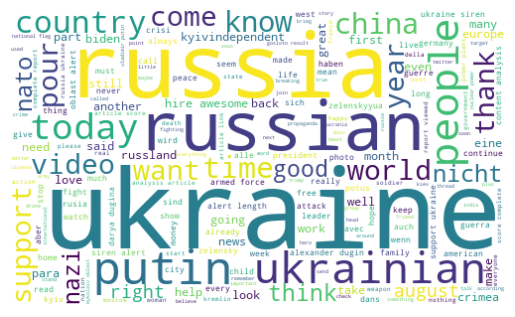

In [39]:
words=' '.join(df['text'])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=110,background_color='white').generate(words)
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')

In [40]:
df.isnull().sum()

text               0
location           0
following          0
followers          0
totaltweets        0
tweetid            0
tweetcreatedts     0
retweetcount       0
tweet              0
hashtags           0
language           0
favorite_count     0
sentiment_score    0
sentiment          0
dtype: int64

In [41]:
df['sentiment'].value_counts()

neutral     101034
positive     19091
negative     16470
Name: sentiment, dtype: int64

In [42]:
ptweets=df[df['sentiment']=='positive']
per_ptweets=(ptweets.shape[0]/df.shape[0])*100
print('Number of positive tweets: ',ptweets.shape[0])
print('% of positive tweets: ',per_ptweets)

Number of positive tweets:  19091
% of positive tweets:  13.976353453640321


In [43]:
ntweets=df[df['sentiment']=='negative']
per_ntweets=(ntweets.shape[0]/df.shape[0])*100
print('Number of negative tweets: ',ntweets.shape[0])
print('% of negative tweets: ',per_ntweets)

Number of negative tweets:  16470
% of negative tweets:  12.057542369779274


In [44]:
neutraltweets=df[df['sentiment']=='neutral']
per_neutraltweets=(neutraltweets.shape[0]/df.shape[0])*100
print('Number of neutral tweets: ',neutraltweets.shape[0])
print('% of neutral tweets: ',per_neutraltweets)

Number of neutral tweets:  101034
% of neutral tweets:  73.9661041765804


Text(0, 0.5, 'Count ->')

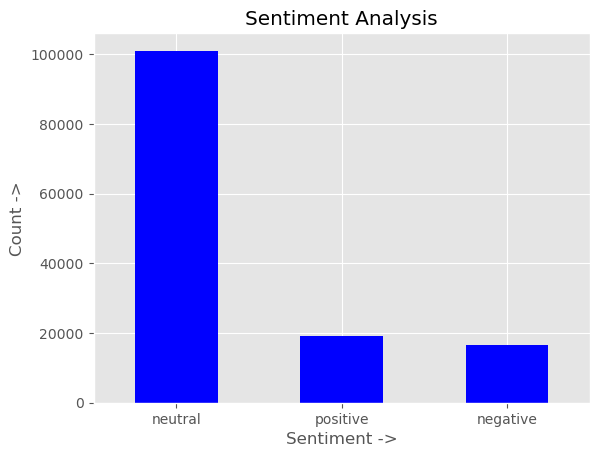

In [45]:
df['sentiment'].value_counts().plot(kind='bar',color='b')
plt.title('Sentiment Analysis')
plt.xticks(rotation=0)
plt.xlabel('Sentiment ->')
plt.ylabel('Count ->')

In [46]:
tokenizer=Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['text'])
x=tokenizer.texts_to_sequences(df['text'])
x=pad_sequences(x,maxlen=100)

In [47]:
x.shape

(136595, 100)

In [48]:
y=pd.get_dummies(df['sentiment']).values
y

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]], dtype=uint8)

In [60]:
y=df['sentiment']
y

0         negative
1          neutral
2         positive
3         positive
4          neutral
            ...   
136590     neutral
136591     neutral
136592     neutral
136593     neutral
136594     neutral
Name: sentiment, Length: 136595, dtype: object

In [61]:
y=y.map({'negative': '0','neutral':'1','positive':'2'})
y

0         0
1         1
2         2
3         2
4         1
         ..
136590    1
136591    1
136592    1
136593    1
136594    1
Name: sentiment, Length: 136595, dtype: object

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [63]:
x_train.shape

(109276, 100)

In [64]:
y_train.shape

(109276,)

## XgBoost

In [56]:
model=xgb.XGBClassifier(n_estimators=500)
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
accuracy=accuracy_score(y_test, y_predict)
print("Accuracy is: ", accuracy)

Accuracy is:  0.8231999707163512


## Random Forest

In [57]:
rfc=RandomForestClassifier(n_estimators=500, criterion='entropy')
rfc.fit(x_train,y_train)
rfc.score(x_test,y_test)
y_predict=rfc.predict(x_test)
accuracy=accuracy_score(y_test, y_predict)
print("Accuracy is: ", accuracy)

Accuracy is:  0.8236026208865624


In [51]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                8256      
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 328,451
Trainable params: 328,451
Non-trainable params: 0
_________________________________________________________________


In [53]:
history=model.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2)

Epoch 1/10
1366/1366 [==============================] - 33s 22ms/step - loss: 0.1646 - accuracy: 0.9401 - precision: 0.9195 - recall: 0.8991 - val_loss: 0.0920 - val_accuracy: 0.9735 - val_precision: 0.9613 - val_recall: 0.9590
Epoch 2/10
1366/1366 [==============================] - 31s 23ms/step - loss: 0.0814 - accuracy: 0.9773 - precision: 0.9664 - recall: 0.9655 - val_loss: 0.0845 - val_accuracy: 0.9766 - val_precision: 0.9653 - val_recall: 0.9645
Epoch 3/10
1366/1366 [==============================] - 31s 23ms/step - loss: 0.0709 - accuracy: 0.9802 - precision: 0.9707 - recall: 0.9698 - val_loss: 0.0860 - val_accuracy: 0.9766 - val_precision: 0.9654 - val_recall: 0.9643
Epoch 4/10
1366/1366 [==============================] - 37s 27ms/step - loss: 0.0599 - accuracy: 0.9831 - precision: 0.9752 - recall: 0.9741 - val_loss: 0.0920 - val_accuracy: 0.9752 - val_precision: 0.9633 - val_recall: 0.9624
Epoch 5/10
1366/1366 [==============================] - 39s 28ms/step - loss: 0.0496 - a

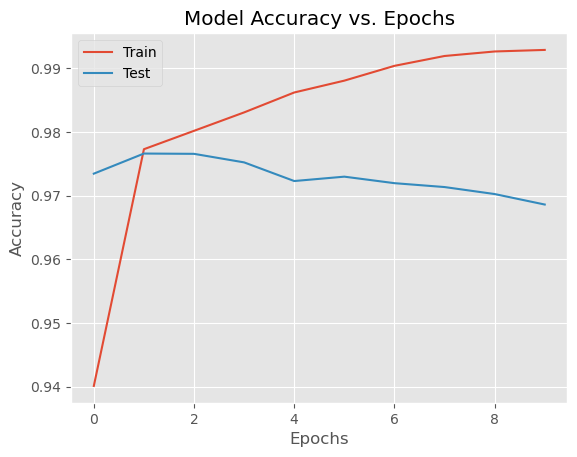

In [54]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy vs. Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Test'])

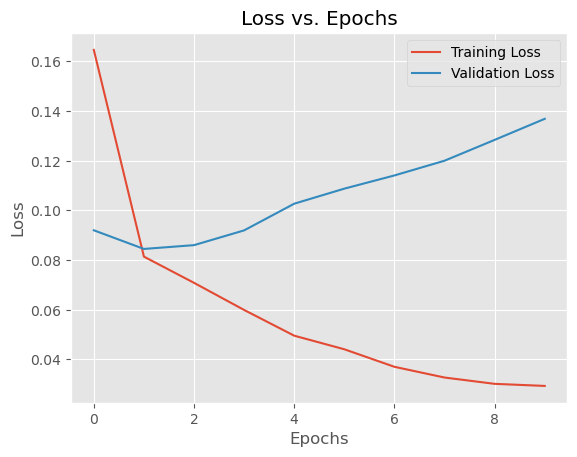

In [55]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()

In [60]:
y_pred = model.predict(x_test)

# Convert predictions from probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print classification report
print(classification_report(y_true, y_pred))

854/854 [==============================] - 3s 4ms/step
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      3310
           1       0.98      0.98      0.98     20164
           2       0.91      0.86      0.89      3845

    accuracy                           0.95     27319
   macro avg       0.91      0.90      0.90     27319
weighted avg       0.95      0.95      0.95     27319



In [66]:
print('Accuracy is: ',accuracy_score(y_pred,y_true))

Accuracy is:  0.9502177971375233


Text(50.722222222222214, 0.5, 'True Labels->')

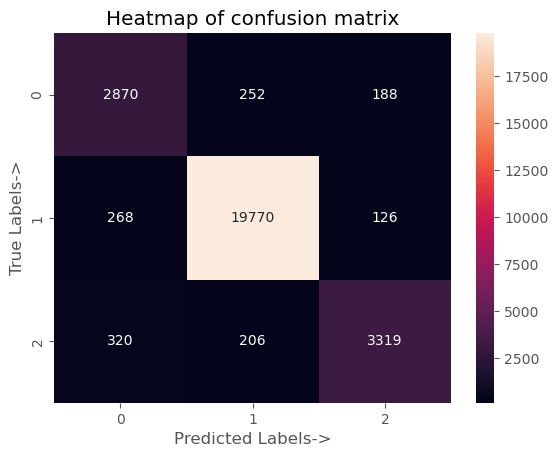

In [67]:
# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the heatmap
sns.heatmap(cm, annot=True, fmt='d', cbar=True)
plt.title('Heatmap of confusion matrix')
plt.xlabel('Predicted Labels->')
plt.ylabel('True Labels->')